<a href="https://colab.research.google.com/github/chsanabriam/Taller_Redes_Complejas/blob/main/Archivo_Trabajo_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Analizar datasets de información transaccional y de composición empresarial.

Este ejercicio tiene el siguiente contexto:

Empresa manufacturera del sector textiles que se dedica a la producción y venta de productos de alta calidad. Cuenta con más de 10 años de experiencia en el mercado y se ha expandido a nivel internacional, razón por la cual tiene clientes de diferentes nacionalidades. La empresa tiene una amplia variedad de productos que abarcan desde bienes de consumo hasta equipos y maquinaria industrial. Entre sus actividades económicas se encuentran la fabricación, el diseño, la distribución y la venta de productos a nivel nacional e internacional.

La empresa cuenta con dos bases de datos una transaccional y otra de composición.

La base transaccional tiene los siguientes campos:

| Variable               | Descripción                                                            |
|------------------------|------------------------------------------------------------------------|
| ID_Cliente             | Número de identificación del cliente                                    |
| Nombre_Cliente         | Nombre completo del cliente registrado en los registros de la empresa   |
| Nacionalidad           | País de origen del cliente                                              |
| Tipo_Transacción       | Tipo de transacción si es exportaciones o importaciones                 |
| Pais_Origen            | País donde se originó la transacción                                    |
| Pais_Destino           | País donde se recibió el pago de la transacción                         |
| Fecha_Transacción      | Fecha en que se realizó la transacción                                  |
| Monto_Transacción      | Valor monetario de la transacción realizada por el cliente              |
| Producto/Servicio      | Descripción del producto o servicio adquirido por el cliente            |
| Cantidad               | Cantidad del producto o servicio adquirido                              |
| Forma_Pago_Transacción | Forma de pago utilizada en la transacción                               |
| Moneda                 | Tipo de moneda utilizada para realizar la transacción                   |
| Numero_Cuenta          | Número de cuenta bancaria utilizada para realizar la transacción        |
| Titular_Cuenta         | Nombre del titular de la cuenta bancaria                                |


Por otro lado la base de composición tiene una estructura similar a la siguiente:

| Empresa    | Nombre         | Tipo                  | Porcentaje (%) |
|------------|----------------|-----------------------|-----------------|
| ASN LLC    | Andres Araujo  | Representante Legal   |                 |
|            | Sandra Borja   | Socio                 | 90              |
|            | Niles Smith    | Socio                 | 10              |

La idea del ejercicio es realizar un análisis sobre esta información y encontrar en caso de que exista alguna posible situación de riesgo. 

Descargar los archivos.
Nota: Los archivos están en encoding `utf8` y tienen como separador `|`

In [1]:
!wget https://github.com/chsanabriam/Taller_Redes_Complejas/raw/main/Insumos_Taller/info_transacciones_empresa.csv

--2023-05-19 21:34:19--  https://github.com/chsanabriam/Taller_Redes_Complejas/raw/main/Insumos_Taller/info_transacciones_empresa.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chsanabriam/Taller_Redes_Complejas/main/Insumos_Taller/info_transacciones_empresa.csv [following]
--2023-05-19 21:34:19--  https://raw.githubusercontent.com/chsanabriam/Taller_Redes_Complejas/main/Insumos_Taller/info_transacciones_empresa.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1853182 (1.8M) [text/plain]
Saving to: ‘info_transacciones_empresa.csv’

info_transacciones_ 100%[===================>]   1.77M  

In [2]:
!wget https://github.com/chsanabriam/Taller_Redes_Complejas/raw/main/Insumos_Taller/info_composicion_clientes.csv

--2023-05-19 21:34:19--  https://github.com/chsanabriam/Taller_Redes_Complejas/raw/main/Insumos_Taller/info_composicion_clientes.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chsanabriam/Taller_Redes_Complejas/main/Insumos_Taller/info_composicion_clientes.csv [following]
--2023-05-19 21:34:19--  https://raw.githubusercontent.com/chsanabriam/Taller_Redes_Complejas/main/Insumos_Taller/info_composicion_clientes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18699 (18K) [text/plain]
Saving to: ‘info_composicion_clientes.csv’

info_composicion_cl 100%[===================>]  18.26K  --.-KB/

# 2. Construcción de una red utilizando NetworkX.

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df_comp = pd.read_csv('info_composicion_clientes.csv', encoding='utf-8', sep='|')
df_trx = pd.read_csv('info_transacciones_empresa.csv', encoding='utf-8', sep='|')

In [6]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_empresa      307 non-null    int64 
 1   nombre_empresa  307 non-null    object
 2   id_persona      307 non-null    int64 
 3   nombre_persona  307 non-null    object
 4   tipo            307 non-null    object
 5   participacion   307 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.5+ KB


In [8]:
df_enlaces = df_comp[['id_empresa','id_persona','tipo', 'participacion']]
G = nx.from_pandas_edgelist(df_enlaces, "id_empresa", "id_persona")

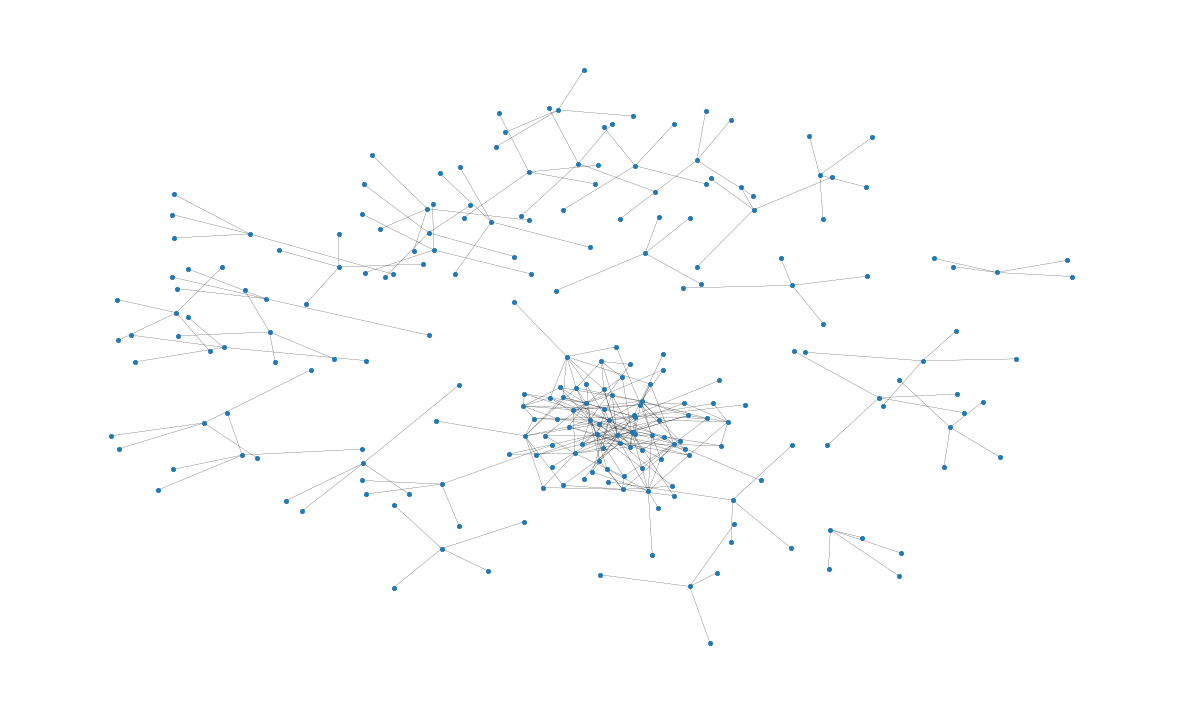

In [9]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

# 3. Análisis de propiedades de la red utilizando NetworkX.

In [10]:
# Número de componentes
nx.number_connected_components(G)

33

In [12]:
[c for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[{27881092,
  66631865,
  112443444,
  126809875,
  130350922,
  149489188,
  165100343,
  171436198,
  183777760,
  184728363,
  206631864,
  207256972,
  207422196,
  211629001,
  254942752,
  256807333,
  281900194,
  287116268,
  288031028,
  300254781,
  300260881,
  331890479,
  343373497,
  368789684,
  384686444,
  387739189,
  390321632,
  399070777,
  399557880,
  404161060,
  419388768,
  425001309,
  425654780,
  433416631,
  458461848,
  476897876,
  481381772,
  483409117,
  499878478,
  503473254,
  553419488,
  555437496,
  577175295,
  587259073,
  608708047,
  611328474,
  654715028,
  661031872,
  672637683,
  679968952,
  695667042,
  697048058,
  702255442,
  714654015,
  716334155,
  735477032,
  750358006,
  767134414,
  786012823,
  789738022,
  821530242,
  831327466,
  833366429,
  900661693,
  901554786,
  918240956,
  930234984,
  935859578,
  944068513,
  944464601,
  951866410,
  961376939,
  976195900},
 {24331902, 56224985, 195642026, 354523301, 94672548

In [14]:
# Calcular la centralidad de intermediación
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

[(207422196, 0.011372363462254221),
 (654715028, 0.01115065594956821),
 (390321632, 0.008689892868999223),
 (976195900, 0.008471003584582519),
 (368789684, 0.007721790302759282),
 (716334155, 0.006986704898863642),
 (833366429, 0.006706710745632438),
 (281900194, 0.006246156306079597),
 (165100343, 0.006105372933420149),
 (171436198, 0.006063991259279491),
 (211629001, 0.005749181219554382),
 (481381772, 0.005387951590289511),
 (735477032, 0.004745860925495911),
 (66631865, 0.004537366865986612),
 (206631864, 0.004333544836280424),
 (399070777, 0.0040811192328537365),
 (951866410, 0.004015699758435911),
 (404161060, 0.0038618648837431117),
 (458461848, 0.0035336995011635034),
 (555437496, 0.0035124318237519676),
 (384686444, 0.0034121996463241837),
 (183777760, 0.003410968040002642),
 (331890479, 0.0033802389961264646),
 (577175295, 0.0031385686989522793),
 (789738022, 0.0030813697230107837),
 (767134414, 0.002469720261809932),
 (608708047, 0.0024542607098890635),
 (499878478, 0.002248

(-1.1211355159748486, 1.201555863508922, -1.184933331379557, 1.171444509688426)

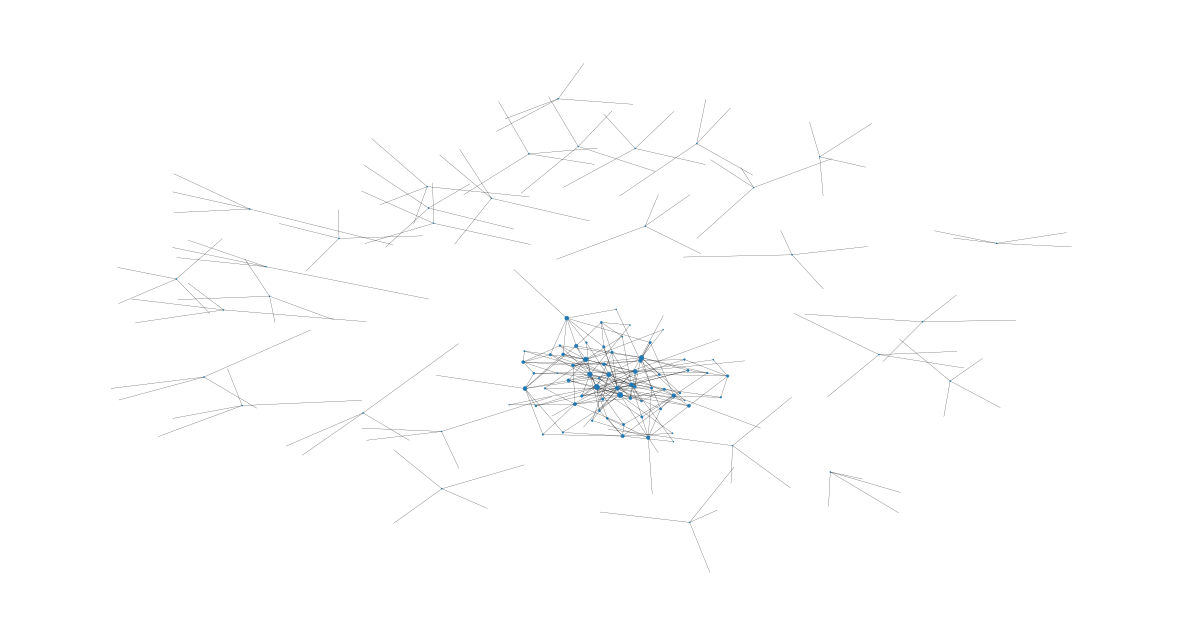

In [15]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [16]:
df_trx.loc[df_trx['id_cliente']==207422196]

,id_cliente,nombre_cliente,nacionalidad,tipo_id,tipo_transaccion,pais_origen,pais_destino,producto_servicio,fecha_transaccion,monto_transaccion,cantidad,forma_pago,moneda,numero_cuenta,titular_cuenta
9057,207422196,Jerez LLC,Argentina,PJ,Importaciones,Camboya,Colombia,productos químicos,2019-09-28,3.103010e+08,463,Cheque,EUR,ES0685848518116408559833,Jason Oliver
9058,207422196,Jerez LLC,Argentina,PJ,Importaciones,Irán,Colombia,insumos,2021-01-21,5.587513e+08,253,Cheque,COP,ES2559839769683245072287,Joseph Odonnell
9059,207422196,Jerez LLC,Argentina,PJ,Importaciones,Venezuela,Colombia,herramientas,2020-09-20,3.051903e+08,781,Tarjeta de crédito,EUR,ES2515968557810438545993,Micaela Alcaraz Olivé
9060,207422196,Jerez LLC,Argentina,PJ,Exportaciones,Colombia,Burkina Faso,Ropa y accesorios de moda,2019-10-10,9.995694e+08,920,Efectivo,EUR,ES7924056756003388047900,Patricia Campillo Cases
9061,207422196,Jerez LLC,Argentina,PJ,Exportaciones,Colombia,Nicaragua,Tejidos y telas,2020-01-17,3.328219e+08,174,Transferencia bancaria,EUR,ES3979142733400157981143,Sigfrido Julio César Nevado Fiol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9133,207422196,Jerez LLC,Argentina,PJ,Exportaciones,Colombia,Haití,Tejidos y telas,2019-12-27,6.063883e+08,795,Tarjeta de crédito,EUR,ES2066775783698328685872,Cecilio Rico Verdú
9134,207422196,Jerez LLC,Argentina,PJ,Exportaciones,Colombia,Guatemala,Tejidos y telas,2021-12-03,7.966287e+08,370,Transferencia bancaria,USD,ES9419516258089886132226,Sigfrido Julio César Nevado Fiol
9135,207422196,Jerez LLC,Argentina,PJ,Exportaciones,Colombia,Paraguay,Ropa y accesorios de moda,2022-05-07,8.357149e+08,654,Cheque,USD,ES2694796472872495139693,Alfonso Hoz Ruano
9136,207422196,Jerez LLC,Argentina,PJ,Importaciones,República Dominicana,Colombia,accesorios de moda,2021-12-02,1.235341e+08,727,Tarjeta de crédito,EUR,ES4084345766767637763455,Alfonso Hoz Ruano


# 4. Visualización avanzada de la red.

# 5. Conclusiones frente al ejercicio.